<p style="font-size:200%;font-weight:bold">RepRisk</p>

- Author: Wenzhi Ding
- Date: 2022-03-18

This notebook is to deal with RepRisk data.

In [4]:
import pandas as pd

In [2]:
DB = "/home/data/"
ROOT = "/home/team_crypto/2022_esg_peer/"

RD = f"{ROOT}02_rdata/"
WD = f"{ROOT}03_wdata/"

# Read Data

In [3]:
news = pd.read_parquet(f'{DB}reprisk/pm_news_data.pq')  # Firm-News
news.shape
news.sample(3)

(717658, 13)

,RepRisk_ID,RepRisk_story_ID,RepRisk_substory_ID,news_date,source_language,related_issues,related_topic_tags,related_UNGC_principles,related_countries,related_countries_codes,severity,novelty,reach
249263,196014,321018,427013,20180510,English,Violation of national legislation,None,None,China,CN,1,1,3
317893,24,161940,202738,20160608,Portuguese,Waste issues,None,Principle 7 (Environment);Principle 8 (Environ...,Brazil,BR,2,1,2
437724,389,28053,34682,20120215,English,"Impacts on landscapes, ecosystems and biodiver...",None,Principle 7 (Environment);Principle 8 (Environ...,Honduras,HN,1,1,1


In [18]:
news['news_date'].min()
news['news_date'].max()

20070102

20201231

In [21]:
df = pd.read_parquet('/home/data/tnic/tnic2_data.pq')
df.sample(3)

,year,gvkey1,gvkey2,score
7951887,2002,10244,9699,0.0353
11397025,1996,13427,9867,0.0216
37319976,2012,66155,186893,0.0219


In [23]:
df.loc[(df['gvkey1'] == 10244) & (df['gvkey2'] == 9699)]

,year,gvkey1,gvkey2,score
7951885,2000,10244,9699,0.0307
7951886,2001,10244,9699,0.0385
7951887,2002,10244,9699,0.0353
7951888,2003,10244,9699,0.0161
7951889,2004,10244,9699,0.0109
7951890,2005,10244,9699,0.0257
7951891,2006,10244,9699,0.0297


In [25]:
df.loc[(df['gvkey1'] == 9699) & (df['year'] == 2006)].sort_values(['score'], ascending=False)

,year,gvkey1,gvkey2,score
7488121,2006,9699,118577,0.0928
7487309,2006,9699,10530,0.0503
7487551,2006,9699,13839,0.0458
7488041,2006,9699,64162,0.0384
7486865,2006,9699,4213,0.0337
7487110,2006,9699,7409,0.0299
7487273,2006,9699,10244,0.0297
7488147,2006,9699,128663,0.0272
7487614,2006,9699,15267,0.0250
7486698,2006,9699,2220,0.0233


<AxesSubplot:>

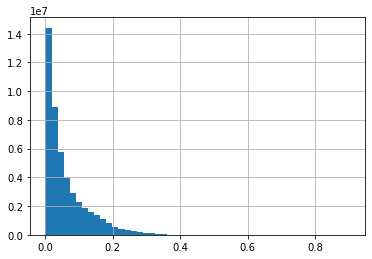

In [22]:
df['score'].hist(bins=50)

In [26]:
ri = pd.read_parquet(f'{DB}reprisk/pm_rri_data.pq')  # Firm-Date RepRisk Index. This can be used as ESG score.
ri.shape
ri.sample(3)

(30505452, 11)

,RepRisk_ID,date,current_RRI,RRI_trend,peak_RRI,peak_RRI_date,RepRisk_rating,country_sector_average,environmental_percentage,social_percentage,governance_percentage
10949919,2052709,20080430,0,0,0,NaN,AA,27,0%,0%,0%
467368,102453,20200531,0,0,0,NaN,AA,21,0%,0%,0%
21076254,415011,20190731,0,0,0,NaN,AAA,19,0%,0%,0%


In [12]:
#iss = pd.read_parquet(f'{DB}reprisk/pm_issue_data.pq')  # Firm-Date issue involvement. This can be used for heterogeneity test.
#iss.shape
#iss.sample(3)

In [11]:
#tag = pd.read_parquet(f'{DB}reprisk/pm_tag_data.pq')  # Firm-Date tag involvement. This can be used for heterogeneity test.
#tag.shape
#tag.sample(3)

In [10]:
#loc = pd.read_parquet(f'{DB}reprisk/pm_location_data.pq')  # Firm-Date location involvement. This can be used for heterogeneity test.
#loc.shape
#loc.sample(3)

In [9]:
#ungc = pd.read_parquet(f'{DB}reprisk/pm_ungc_data.pq')  # Firm-Date UNGC principle involvement. This can be used for heterogeneity test.
#ungc.shape
#ungc.sample(3)

In [9]:
clk = pd.read_parquet(f'{DB}reprisk/reprisk_company_lookup.pq')  # Firm-ISIN link. Firm can have mulitple ISINs, so as multiple obs.
clk.shape
clk.sample(3)

(1038179, 3)

,RepRisk_ID,name,ISIN
120651,129018,Ferrellgas LP (Blue Rhino),US315292AE29
727843,474564,Washington Mutual Mortgage,US939336CU55
476522,2223085,Wings of Lebanon SAL,None


In [14]:
clk.duplicated(subset=['RepRisk_ID']).sum()
clk.duplicated(subset=['RepRisk_ID', 'name']).sum()
clk.duplicated().sum()

480227

480227

0

In [16]:
cid = pd.read_parquet(f'{DB}reprisk/pm_company_identifiers.pq')  # Firm-level aggregate info
cid.shape
cid.sample(3)

(181582, 9)

,RepRisk_ID,name,headquarter_country,headquarter_country_code,sectors,url,all_ISINs,primary_ISIN,No_reported_risk_exposure
18229,128416,Barking Havering and Redbridge University Hosp...,United Kingdom of Great Britain and Northern I...,GB,Health Care Equipment and Services,http://www.bhrhospitals.nhs.uk/,None,None,False
126186,420465,1MG Technologies Pvt Ltd,India,IN,Retail,https://www.1mg.com/,None,None,False
136077,4873,Cavazos Trucking Inc,United States of America,US,Industrial Transportation,None,None,None,False


In [17]:
cid.duplicated(subset=['RepRisk_ID']).sum()

0